In [1]:
import pandas as pd
import numpy as np
import evaluation

## load_data

In [2]:
# load prices
prices = pd.read_csv('example_prices.csv', index_col='dates', parse_dates=['dates'])


## enter your own trading strategy here

In [3]:
def trend_model(prices, trend_window=50, vol_window=100):
    ret = prices.ffill().diff()
    
    pos = pd.DataFrame(np.nan, index=ret.index, columns=ret.columns)
    # loop over all dates
    for t in range(ret.shape[0]-1):
        # Volatility estimate; standard deviation on the last vol_window days, up to t-1
        vol = np.sqrt((ret**2).iloc[t-vol_window:t].mean())
        
        # Mean return between t-trend_window and t-1
        block_ret = ret.iloc[t-trend_window:t].sum()
        # Take a long position if the 50-days return is positive, otherwise take a short position (sign of the block return)
        unadj_pos = np.sign(block_ret)
        
        # Position at date t; risk adjust with volatility from previous date
        pos.iloc[t] = unadj_pos / vol
    return pos

position = trend_model(prices)

## evaluate results

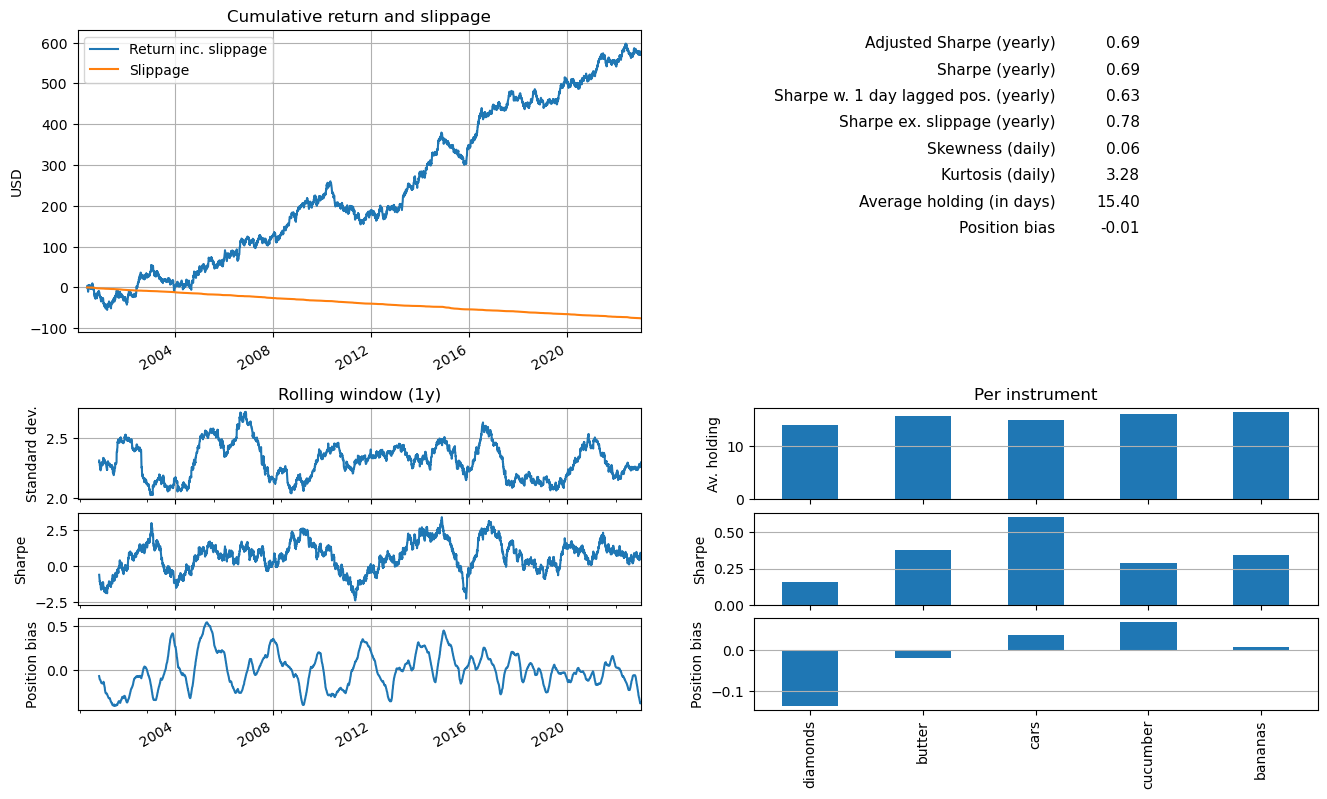

In [4]:
evaluation.plot_key_figures(position, prices)

## save your positions to a file

In [5]:
position.to_csv('results.csv')